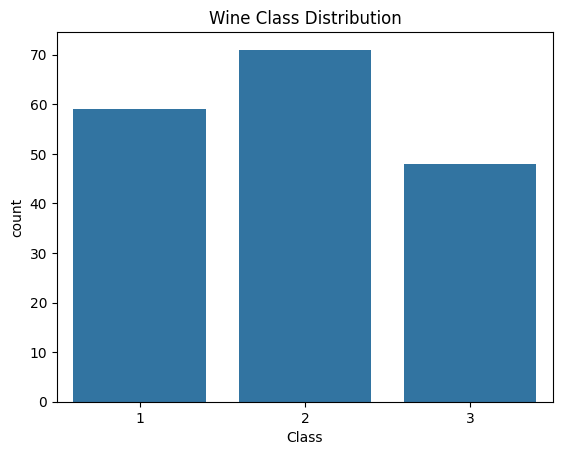

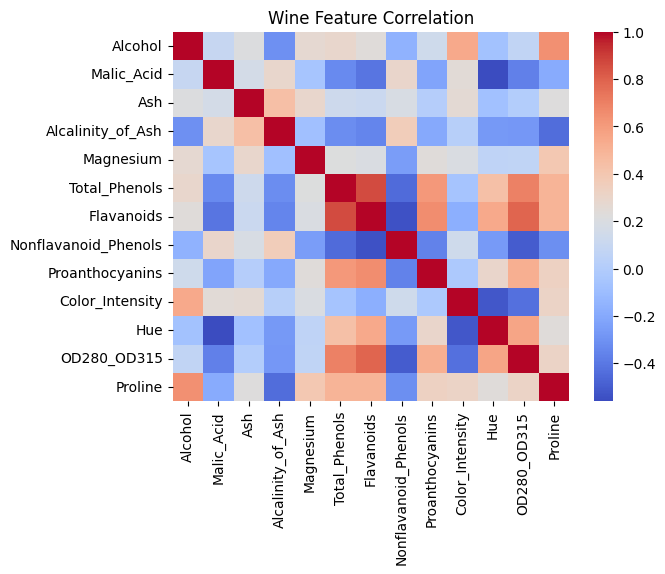

Accuracy: 1.0


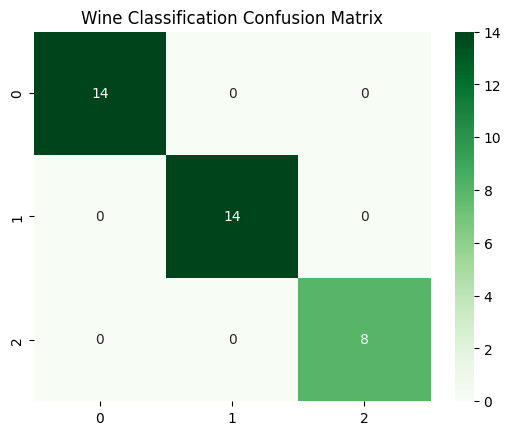

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Column names
columns = [
    "Class","Alcohol","Malic_Acid","Ash","Alcalinity_of_Ash",
    "Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols",
    "Proanthocyanins","Color_Intensity","Hue",
    "OD280_OD315","Proline"
]

# Load data
df = pd.read_csv("wine.data", header=None, names=columns)

# EDA
sns.countplot(x="Class", data=df)
plt.title("Wine Class Distribution")
plt.show()

sns.heatmap(df.drop("Class", axis=1).corr(), cmap="coolwarm")
plt.title("Wine Feature Correlation")
plt.show()

# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Greens")
plt.title("Wine Classification Confusion Matrix")
plt.show()
